In [1]:
import geopandas as gpd

bigs = gpd.read_file('suur_kohanimi.gpkg')

smalls = gpd.read_file('vaike_kohanimi.gpkg')

In [5]:
smalls.count()

Jkn                                 2169
Kohanimi                            2169
Keel                                2169
Kohanime staatus                    2169
Kohanime olek                       2169
Nimeobjekti liik                    2169
Lisainfo                               1
Maakond,omavalitsus,asustusüksus    2169
X                                   2151
Y                                   2151
geometry                            2169
dtype: int64

In [6]:
est = gpd.read_file(r"../data_archive/estonia_without_lakes.shp")
display(est.crs)
est

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,FID_estoni,OBJECTID,NAME,ISO3,ISO2,FIPS,COUNTRY,ENGLISH,FRENCH,SPANISH,...,kkr_kood,nimetus,knr_id,markused,vajalik,vajalik_t,_count,_sum,_mean,geometry
0,0,76,Estonia,EST,EE,EN,Estonia,Estonia,Estonie,Estonia,...,None,None,0.0,None,0,None,131241100.0,7.718100e+09,58.808563,"MULTIPOLYGON Z (((25.82342 59.67719 0.00000, 2..."


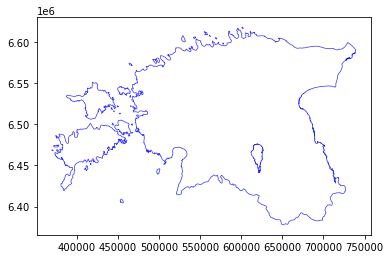

In [7]:
est3301 = est.to_crs(epsg=3301)
base = est3301.plot(facecolor="none", edgecolor='blue', lw=0.7, alpha=0.8)

In [14]:
ba = est3301.total_bounds
minx, miny, maxx, maxy = ba[0],ba[1],ba[2],ba[3]

print(f"x dist m = {maxx-minx }")
print(f"y dist m = {maxy-miny}")

x dist m = 369542.849655783
y dist m = 240410.9813869521


In [32]:
from shapely.geometry import box, Polygon, Point
import pandas as pd

x_len = int ( (maxx-minx) / 1000 )
y_len = int ( (maxy-miny) / 1000 )

grid_cells = []
counter = 0

for i in range(x_len):
    for j in range(y_len):
        lx = minx + (i*1000)
        ux = minx + (i*1000) + 1000
        ly = miny + (j*1000)
        uy = miny + (j*1000) + 1000
        that_p = box(lx, ly, ux, uy)
        counter = counter + 1
        grid_cells.append({'geometry': that_p, 'idx': counter})

grid = gpd.GeoDataFrame(pd.DataFrame(grid_cells), geometry='geometry', crs=3301)

# grid.plot()

In [33]:
import shapely.speedups

shapely.speedups.enable()

In [34]:
from geopandas.tools import sjoin

grids_bigs = sjoin(grid, bigs,  how="inner", op="contains")
grids_bigs

,geometry,idx,index_right,Jkn,Kohanimi,Keel,Kohanime staatus,Kohanime olek,Nimeobjekti liik,Lisainfo,"Maakond,omavalitsus,asustusüksus",X,Y
1052,"POLYGON ((374616.323 6469690.671, 374616.323 6...",1053,5,6,Suur kolmekivurahu,eesti,mitteametlik muu nimi,kehtiv,"saarestik, saar, laid, kare, maa, rahu",None,"Saare maakond, Saaremaa vald, Eeriksaare küla",6470513.00,374402.00
1052,"POLYGON ((374616.323 6469690.671, 374616.323 6...",1053,4,5,Suur Kolmekivirahu,eesti,ametlik põhinimi,kehtiv,"saarestik, saar, laid, kare, maa, rahu",None,"Saare maakond, Saaremaa vald, Eeriksaare küla",6470513.00,374402.00
1055,"POLYGON ((374616.323 6472690.671, 374616.323 6...",1056,1119,1120,Suurearu-Ulmi,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Saare maakond, Saaremaa vald, Vilsandi küla",6473332.23,374575.86
1527,"POLYGON ((376616.323 6464690.671, 376616.323 6...",1528,495,496,Suurrahu,eesti,mitteametlik esikohanimi,kehtiv,"saarestik, saar, laid, kare, maa, rahu",None,"Saare maakond, Saaremaa vald, Atla küla",6465655.50,376058.10
1770,"POLYGON ((377616.323 6467690.671, 377616.323 6...",1771,126,127,Suurispuu tee,eesti,ametlik põhinimi,kehtiv,"tee, ringtee ...",None,"Saare maakond, Saaremaa vald, Eeriksaare küla",6467852.04,376954.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87573,"POLYGON ((734616.323 6590690.671, 734616.323 6...",87574,1681,1682,Suurepõllu,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Ida-Viru maakond, Narva-Jõesuu linn, Olgina al...",6591679.00,733784.91
88293,"POLYGON ((737616.323 6590690.671, 737616.323 6...",88294,1565,1566,Suur-Äkke,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Ida-Viru maakond, Narva linn",6591512.94,736658.69
88528,"POLYGON ((738616.323 6585690.671, 738616.323 6...",88529,1836,1837,Suursaar,eesti,mitteametlik esikohanimi,kehtiv,"madal, kari, rahu, kuiv",None,"Ida-Viru maakond, Narva linn",6585842.00,737756.00
88531,"POLYGON ((738616.323 6588690.671, 738616.323 6...",88532,482,483,Suur-Aguli tänav,eesti,ametlik põhinimi,kehtiv,liikluspind,None,"Ida-Viru maakond, Narva linn",6589157.38,737893.55


In [35]:
grids_smalls = sjoin(grid, smalls,  how="inner", op="contains")
grids_smalls

,geometry,idx,index_right,Jkn,Kohanimi,Keel,Kohanime staatus,Kohanime olek,Nimeobjekti liik,Lisainfo,"Maakond,omavalitsus,asustusüksus",X,Y
815,"POLYGON ((373616.323 6472690.671, 373616.323 6...",816,1557,1558,Väike-Kõrtsi,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Saare maakond, Saaremaa vald, Vilsandi küla",6472926.44,373459.28
1775,"POLYGON ((377616.323 6472690.671, 377616.323 6...",1776,1911,1912,Väike-Vilsandi poolsaar,eesti,mitteametlik esikohanimi,kehtiv,poolsaar,None,"Saare maakond, Saaremaa vald, Vilsandi küla",6473605.00,377141.00
2242,"POLYGON ((379616.323 6459690.671, 379616.323 6...",2243,188,189,Väike-Nonni järv,eesti,mitteametlik esikohanimi,kehtiv,"järvistu, järv, lais, järvesopp, laugas",None,"Saare maakond, Saaremaa vald, Karala küla // S...",6460089.70,379005.56
2261,"POLYGON ((379616.323 6478690.671, 379616.323 6...",2262,1387,1388,Väike-Kadaka,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Saare maakond, Saaremaa vald, Kõruse küla",6479530.94,379440.95
2481,"POLYGON ((380616.323 6458690.671, 380616.323 6...",2482,305,306,Väike-Roobimaa järv,eesti,ametlik põhinimi,kehtiv,"järvistu, järv, lais, järvesopp, laugas",None,"Saare maakond, Saaremaa vald, Karala küla // S...",6459300.00,380163.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88053,"POLYGON ((736616.323 6590690.671, 736616.323 6...",88054,242,243,Väikemägi,eesti,mitteametlik esikohanimi,kehtiv,"mägi, oos, voor, rannavall, luide",None,"Ida-Viru maakond, Narva linn",6591242.60,735980.90
88053,"POLYGON ((736616.323 6590690.671, 736616.323 6...",88054,1966,1967,Väike-Äkke,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Ida-Viru maakond, Narva linn",6591242.05,736589.06
88288,"POLYGON ((737616.323 6585690.671, 737616.323 6...",88289,1961,1962,Väike-Looga tänav,eesti,ametlik põhinimi,kehtiv,liikluspind,None,"Ida-Viru maakond, Narva linn",6586172.35,737296.86
88534,"POLYGON ((738616.323 6591690.671, 738616.323 6...",88535,33,34,Väikesaare tänav,eesti,ametlik põhinimi,kehtiv,liikluspind,None,"Ida-Viru maakond, Narva linn",6591920.04,737713.57


In [ ]:
def take_first_one(idx, subdf):
    

collector = []

for idx, subdf in grids_smalls.groupby('idx'):
    exp = take_first_one(idx, subdf)